In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# from six_axis_utility.utilities import quaternion_to_euler

# Load the CSV file
file_path = "./test.csv"
df = pd.read_csv(file_path)

# Display the first few rows to understand the structure
df.head()

,timestamp,orientation_x,orientation_y,orientation_z,orientation_w,angular_velocity_x,angular_velocity_y,angular_velocity_z,linear_acceleration_x,linear_acceleration_y,linear_acceleration_z
0,1.729227e+09,-0.008897,0.003891,-0.952513,0.304343,0.0,0.0,0.0,0.177904,-0.035894,9.808186
1,1.729227e+09,-0.008897,0.003891,-0.952513,0.304343,0.0,0.0,0.0,0.216282,-0.050937,9.807257
2,1.729227e+09,-0.008897,0.003891,-0.952513,0.304343,0.0,0.0,0.0,0.174318,0.028035,9.809008
3,1.729227e+09,-0.008897,0.003891,-0.952513,0.304343,0.0,0.0,0.0,0.135931,0.043079,9.809467
4,1.729227e+09,-0.008897,0.003891,-0.952513,0.304343,0.0,0.0,0.0,0.264055,-0.121763,9.806037


In [3]:
# Drop the timestamp columns to calculate statistics for the rest
df_filtered = df.drop(columns=["timestamp", "timestamp_normalized"], errors="ignore")

# Calculate min, max, and standard deviation for each column using pandas
min_values = df_filtered.min()
max_values = df_filtered.max()
std_values = df_filtered.std()

# Display the results
print("Minimum Values for Each Column:")
print(min_values)
print("\nMaximum Values for Each Column:")
print(max_values)
print("\nStandard Deviation for Each Column:")
print(std_values)

Minimum Values for Each Column:
orientation_x            -0.015856
orientation_y            -0.011582
orientation_z            -0.989277
orientation_w             0.145906
angular_velocity_x      -19.567898
angular_velocity_y      -10.006378
angular_velocity_z      -99.900000
linear_acceleration_x   -39.849754
linear_acceleration_y   -28.119122
linear_acceleration_z     1.568612
dtype: float64

Maximum Values for Each Column:
orientation_x             0.006661
orientation_y             0.037853
orientation_z             0.987327
orientation_w             0.999979
angular_velocity_x       15.052318
angular_velocity_y        7.523584
angular_velocity_z       99.900000
linear_acceleration_x    14.054581
linear_acceleration_y    30.966824
linear_acceleration_z    31.829058
dtype: float64

Standard Deviation for Each Column:
orientation_x             0.004521
orientation_y             0.010295
orientation_z             0.705615
orientation_w             0.332908
angular_velocity_x        2.

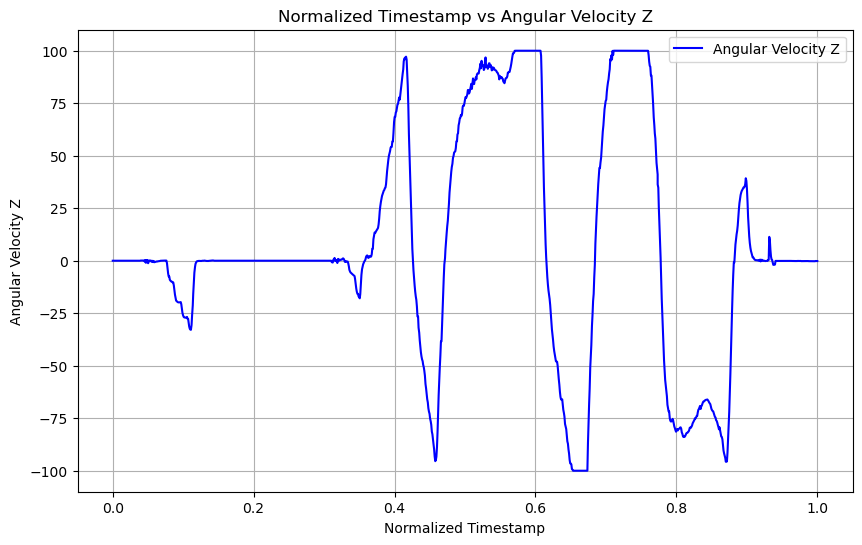

In [2]:
# Normalize the timestamp to range [0, 1] for this session
min_timestamp = df["timestamp"].min()
max_timestamp = df["timestamp"].max()

# Apply normalization
df["timestamp_normalized"] = (df["timestamp"] - min_timestamp) / (
    max_timestamp - min_timestamp
)

# Plot timestamp (normalized) versus angular_velocity_z
plt.figure(figsize=(10, 6))
plt.plot(
    df["timestamp_normalized"],
    df["angular_velocity_z"],
    label="Angular Velocity Z",
    color="b",
)
plt.xlabel("Normalized Timestamp")
plt.ylabel("Angular Velocity Z")
plt.title("Normalized Timestamp vs Angular Velocity Z")
plt.legend()
plt.grid(True)
plt.show()